In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Merging 12 months of sales data into a single file

In [2]:
import os  # to find all files in a directory

filepath = 'C:\\Users\\fwill03\\Documents\\Jupyter Notebook\\Portfolio\\Sales analysis\\data\\'

df_allsales_2019 = pd.DataFrame()  # empty dataframe


files = [file for file in os.listdir(filepath)]  # listing out all the files in directory

for file in files:
    df_allsales_2019 = pd.concat([df_allsales_2019, pd.read_csv(filepath + file)])  # merging/ concat all files into single dataframe
    
df_allsales_2019.to_csv('all_data.csv', index= False)   


In [3]:
df_allsales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## DATA CLEANING 

#### Checking for null values and duplicates

In [4]:
df_allsales_2019.isnull().sum()

# dropping 545 rows out of >180k rows seemed acceptable.

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df_allsales_2019.nunique()

# There are only 178k unique order id vs. 186k rows. So there are quite a number of duplicates. 
# We should drop them as well.  

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [6]:
df_allsales_2019.drop_duplicates(inplace= True)

In [7]:
df_allsales_2019.dropna(inplace= True)

#### Checking file type 

In [8]:
df_allsales_2019.dtypes

# Need to convert quantity, price to numerical so we can calculate them. 
# Need to convert/ extract month from order date as well. 

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Removing header which were copied when we are merging multiple data files. 

In [9]:
df_allsales_2019[df_allsales_2019['Order Date'] == 'Order Date'].index

Int64Index([519], dtype='int64')

In [10]:
df_allsales_2019.drop(df_allsales_2019[df_allsales_2019['Order Date'] == 'Order Date'].index, inplace= True)
df_allsales_2019.reset_index(drop= True, inplace= True)


#### Extract the month from 'order date' columns into months

In [11]:
# Extracting from string.

#df_allsales_2019[['date', 'time']] = df_allsales_2019['Order Date'].str.split(' ', expand= True)
#df_allsales_2019['month'] = df_allsales_2019['date'].str[:2].astype('int32')

In [12]:
# Converting to datetime and extract from datetime. 

df_allsales_2019['Order Date'] = pd.to_datetime(df_allsales_2019['Order Date'])

In [13]:
df_allsales_2019['month'] = df_allsales_2019['Order Date'].dt.month
df_allsales_2019['day_of_week'] = df_allsales_2019['Order Date'].dt.day_name()
df_allsales_2019['hour'] = df_allsales_2019['Order Date'].dt.hour

#### Convert price and quantity to numerical 

In [14]:
df_allsales_2019['Quantity Ordered'] = pd.to_numeric(df_allsales_2019['Quantity Ordered'])
df_allsales_2019['Price Each'] = pd.to_numeric(df_allsales_2019['Price Each'])

In [15]:
df_allsales_2019.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
month                        int64
day_of_week                 object
hour                         int64
dtype: object

#### Adding Sales amount


In [16]:
df_allsales_2019['sales'] = df_allsales_2019['Quantity Ordered'] * df_allsales_2019['Price Each']

In [17]:
df_allsales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,day_of_week,hour,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Friday,8,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Sunday,22,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Tuesday,9,11.99
...,...,...,...,...,...,...,...,...,...,...
185670,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Tuesday,20,8.97
185671,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,Sunday,16,700.00
185672,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,Monday,7,700.00
185673,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,Thursday,17,379.99


#### Extract City and State from Purchase Address 

In [18]:
# extract 1 by 1 and concat
df_allsales_2019['Purchase Address'].str.split(',', expand= True)[1] + ' (' + df_allsales_2019['Purchase Address'].str.split(',', expand= True)[2].str.split(' ', expand= True)[1] + ')'

# alteratively use .apply and lambda in an f string:
df_allsales_2019['city'] = df_allsales_2019['Purchase Address'].apply( lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")

df_allsales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,day_of_week,hour,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Friday,8,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Sunday,22,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Tuesday,9,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
185670,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Tuesday,20,8.97,Los Angeles (CA)
185671,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,Sunday,16,700.00,San Francisco (CA)
185672,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,Monday,7,700.00,San Francisco (CA)
185673,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,Thursday,17,379.99,San Francisco (CA)


### DATA EXPLORATION

#### Month with highest sales


In [19]:
sales_per_month = df_allsales_2019.groupby('month').sum().reset_index()
sales_per_month

,month,Quantity Ordered,Price Each,hour,sales
0,1,10892,1810824.82,139321,1821313.17
1,2,13430,2186937.39,172378,2200075.09
2,3,16978,2789080.80,218611,2804969.51
3,4,20536,3366218.76,261916,3389217.98
4,5,18652,3133024.62,238560,3150506.24
5,6,15233,2560491.51,195214,2576268.16
6,7,16053,2631075.12,205894,2646311.32
7,8,13428,2226951.91,172034,2241071.38
8,9,13090,2081885.70,168183,2094453.74
9,10,22668,3713008.80,290174,3734177.86


Text(0, 0.5, 'Sales in USD (million)')

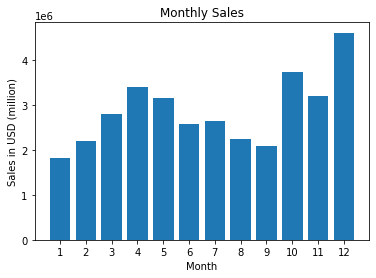

In [20]:
plt.bar(x= 'month', height= 'sales', data= sales_per_month)
plt.title('Monthly Sales')
plt.xticks(sales_per_month['month'])
#plt.yticks(sales_per_month['sales'])
plt.xlabel('Month')
plt.ylabel('Sales in USD (million)')

#### Questions to explore:

- Why highest sales in Oct-Dec?
- Why the increase during Mar-May?  
- Why the slight increase in Jul? 

#### City with highest sales

In [21]:
sales_per_city= df_allsales_2019.groupby('city').sum().reset_index()
sales_per_city

,city,Quantity Ordered,Price Each,month,hour,sales
0,Atlanta (GA),16583,2778604.85,104646,213992,2794195.23
1,Austin (TX),11136,1808325.08,69708,141668,1818029.38
2,Boston (MA),22492,3633698.41,140887,287678,3657927.66
3,Dallas (TX),16707,2750026.38,104447,214078,2765373.96
4,Los Angeles (CA),33245,5417147.76,208003,426886,5448280.34
5,New York City (NY),27901,4632767.55,175548,357185,4661714.15
6,Portland (ME),2746,446752.36,17119,35152,449321.38
7,Portland (OR),11291,1859836.44,70517,144242,1870010.56
8,San Francisco (CA),50166,8203867.45,314927,642226,8254609.62
9,Seattle (WA),16534,2730586.55,104817,213005,2745046.02


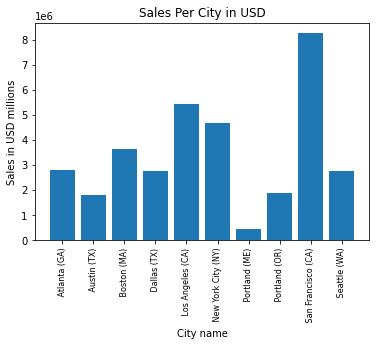

In [22]:
plt.bar(data= sales_per_city, x= 'city', height= 'sales') 
plt.title('Sales Per City in USD')
plt.xticks(sales_per_city['city'], rotation= 'vertical', size= 8)
plt.xlabel('City name')
plt.ylabel('Sales in USD millions')
plt.show()

#### Questions to explore:
- Why San Francisco booked the highest sales?
- Why Portland (ME) has the lowest sales? 

#### Investigating Consumer Behaviour

#### Popular shopping time 

In [23]:
sales_based_on_hour= df_allsales_2019.groupby('hour').sum().reset_index()

Text(0, 0.5, 'Sales in USD millions')

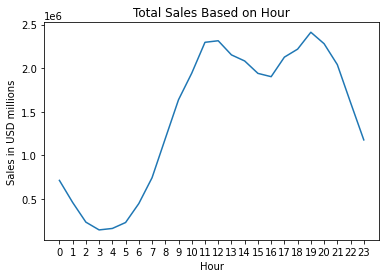

In [24]:
plt.plot(sales_based_on_hour['hour'], sales_based_on_hour['sales'])
plt.title('Total Sales Based on Hour')
plt.xticks(sales_based_on_hour['hour'])
plt.xlabel('Hour')
plt.ylabel('Sales in USD millions')

In [25]:
number_oforders_perhour = df_allsales_2019.groupby('hour').count().reset_index()

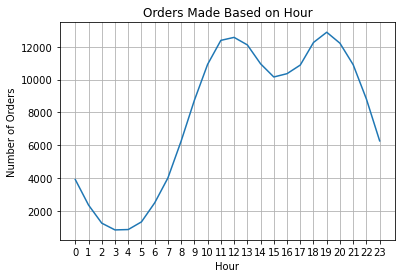

In [26]:
plt.plot(number_oforders_perhour['hour'], number_oforders_perhour['sales'])
plt.title('Orders Made Based on Hour')
plt.xticks(sales_based_on_hour['hour'])
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

#### Questions to explore:
- Peak sales and orders are the same in 11.00 and 19.00. Why during those times?
- Best targetted advertisement time? 

In [27]:
# Same behaviour in all cities?

In [29]:
df_allsales_2019.groupby(['city', 'hour']).sum().reset_index()

,city,hour,Quantity Ordered,Price Each,month,sales
0,Atlanta (GA),0,357,62435.44,2165,62855.02
1,Atlanta (GA),1,236,44191.50,1484,44443.32
2,Atlanta (GA),2,116,25176.53,788,25199.15
3,Atlanta (GA),3,68,6983.90,445,7018.49
4,Atlanta (GA),4,88,18906.69,558,18954.97
...,...,...,...,...,...,...
235,Seattle (WA),19,1085,182891.44,7123,183667.61
236,Seattle (WA),20,1119,167493.05,7052,168681.88
237,Seattle (WA),21,968,170138.75,6175,170702.97
238,Seattle (WA),22,785,136158.11,4922,136919.63


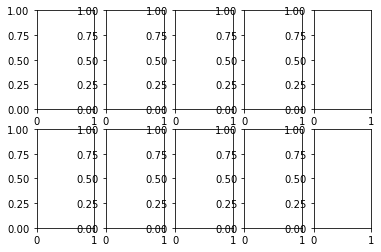

In [31]:
fig, axs = plt.subplots(2,5)

In [32]:
df_allsales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,day_of_week,hour,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Friday,8,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Sunday,22,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Tuesday,9,11.99,Los Angeles (CA)


#### Popular Products

In [102]:
sales_per_product= df_allsales_2019.groupby('Product')[['Quantity Ordered', 'sales']].sum().reset_index()
sales_per_product.head()

,Product,Quantity Ordered,sales
0,20in Monitor,4125,453708.75
1,27in 4K Gaming Monitor,6239,2433147.61
2,27in FHD Monitor,7541,1131074.59
3,34in Ultrawide Monitor,6192,2352898.08
4,AA Batteries (4-pack),27614,106037.76


Text(0, 0.5, 'Sales in USD (millions)')

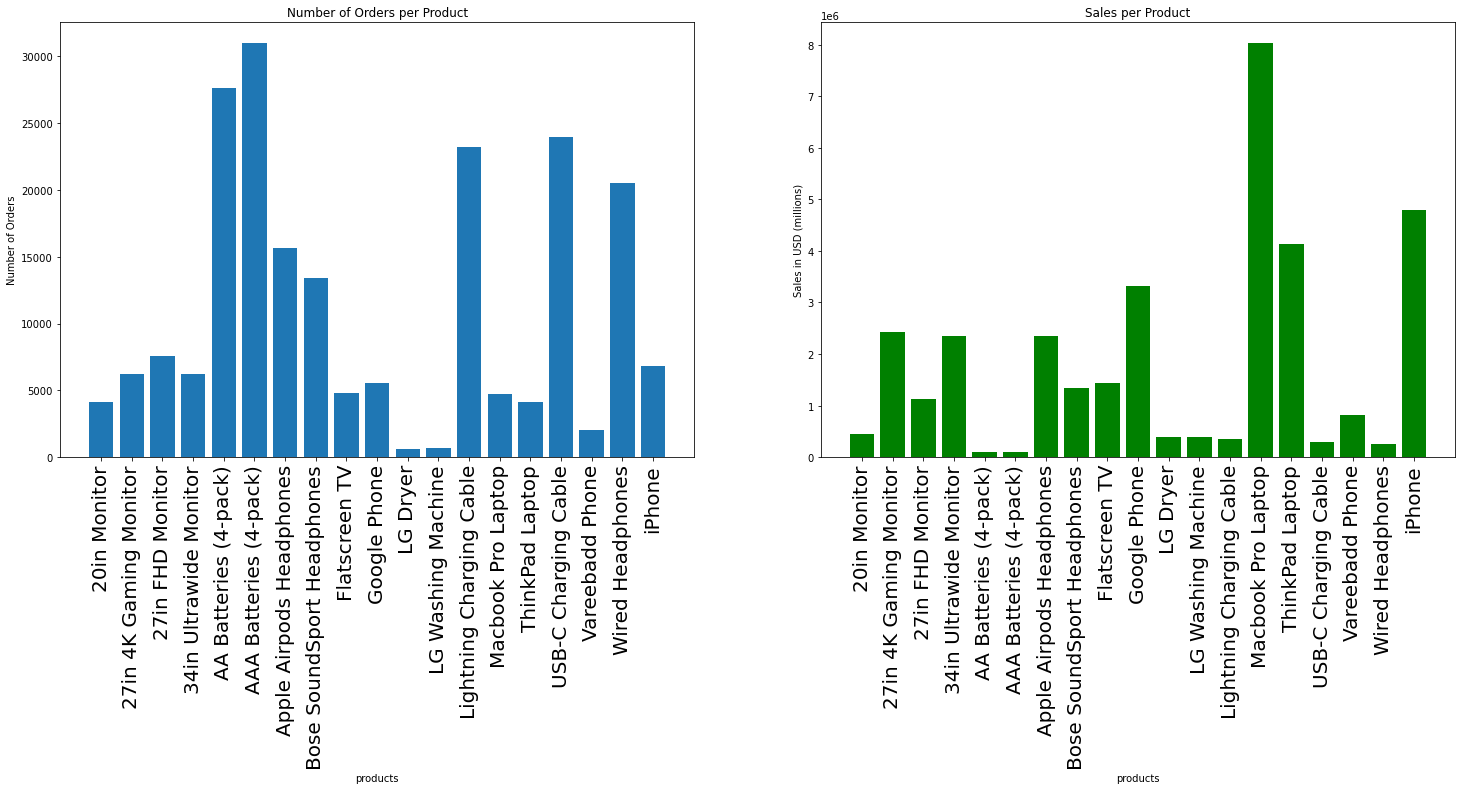

In [77]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.bar(data= sales_per_product, x='Product', height='Quantity Ordered')
plt.title('Number of Orders per Product')
plt.xticks(sales_per_product['Product'], rotation= 'vertical', size= 20)
plt.xlabel('products')
plt.ylabel('Number of Orders')



plt.subplot(1,2,2)
plt.bar(data= sales_per_product, x='Product', height='sales', color= 'g')
plt.title('Sales per Product')
plt.xticks(sales_per_product['Product'], rotation= 'vertical', size= 20)
plt.xlabel('products')
plt.ylabel('Sales in USD (millions)')



<ipython-input-128-9179953dd3f2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sales_per_product['Product'], rotation= 'vertical', size= 10)


Text(0, 0.5, 'Prices in USD')

<Figure size 1800x576 with 0 Axes>

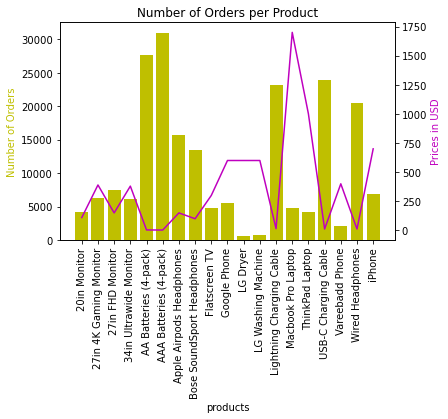

In [128]:
# To add prices in our graph
prices = df_allsales_2019.groupby('Product')['Price Each'].mean().reset_index()

plt.figure(figsize=(25,8))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # creating twin axes, sharing x axis
ax1.bar(data= sales_per_product, x='Product', height='Quantity Ordered', color= 'y')
ax2.plot(prices['Product'], prices['Price Each'], color= 'm')

plt.title('Number of Orders per Product')
ax1.set_xticklabels(sales_per_product['Product'], rotation= 'vertical', size= 10)
ax1.set_xlabel('products')
ax1.set_ylabel('Number of Orders', color= 'y')
ax2.set_ylabel('Prices in USD', color= 'm')




#### Frequently Purchased Together

In [86]:
# Find orders with more than 1 items 

duplicate_order_id = df_allsales_2019[df_allsales_2019['Order ID'].duplicated(keep= False)]

duplicate_order_id.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,day_of_week,hour,sales,city
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,11.99,Los Angeles (CA)


In [88]:
# Combine all products in the same Order ID in a single line. 
 
duplicate_order_id['grouped'] = duplicate_order_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

duplicate_order_id.head(2)

# Notice that duplicate Order ID remained. 

<ipython-input-88-df44ae1f1202>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_order_id['grouped'] = duplicate_order_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,day_of_week,hour,sales,city,grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,600.00,Los Angeles (CA),"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Friday,14,11.99,Los Angeles (CA),"Google Phone,Wired Headphones"


In [90]:
# Removing duplicate Order ID

product_mix = duplicate_order_id[['Order ID', 'grouped']].drop_duplicates()
product_mix.head()

,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [101]:
# counting order with certain product pairs; using itertools
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in product_mix['grouped']:
    row_list = row.split(',')  # need to convert 'grouped' columns into a sublist
    count.update(Counter(combinations(row_list, 4)))  # 2 or 3 or 4 etc --> only counts rows with 2 or 3 or 4 items 

count.most_common(10)

# or use 

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', '34in Ultrawide Monitor') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
